In [4]:
!pip install finquant

     |████████████████████████████████| 6.4 MB 10.6 MB/s 
     |████████████████████████████████| 63 kB 2.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [5]:
import finquant as fq
from finquant.portfolio import build_portfolio  
from finquant.returns import historical_mean_return
names = ['^IXIC','FTSEMIB.MI','^N225','GOLD','^GSPC','^HSI',]
start_date = '1971-01-01'
end_date = '2022-02-18'
pf = build_portfolio(names=names, start_date=start_date, end_date=end_date, data_api="yfinance")

[*********************100%***********************]  6 of 6 completed


pf.risk_free_rate = 0.018
----------------------------------------------------------------------
Stocks: ^IXIC, FTSEMIB.MI, ^N225, GOLD, ^GSPC, ^HSI
Time window/frequency: 252
Risk free rate: 0.005
Portfolio Expected Return: 0.098
Portfolio Volatility: 0.149
Portfolio Sharpe Ratio: 0.622

Skewness:
     ^IXIC  FTSEMIB.MI     ^N225      GOLD     ^GSPC      ^HSI
0  2.36532    0.707712  0.525725  0.743282  1.467741  0.013626

Kurtosis:
      ^IXIC  FTSEMIB.MI     ^N225      GOLD     ^GSPC      ^HSI
0  6.205581   -0.480109 -0.222334  0.401601  2.155091 -1.161423

Information:
   Allocation        Name
0    0.166667       ^IXIC
1    0.166667  FTSEMIB.MI
2    0.166667       ^N225
3    0.166667        GOLD
4    0.166667       ^GSPC
5    0.166667        ^HSI
----------------------------------------------------------------------


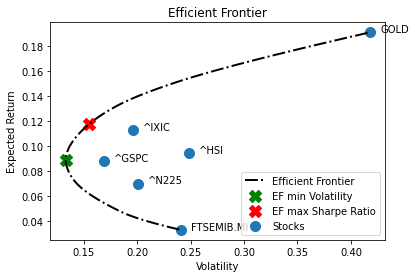

In [20]:
print("pf.risk_free_rate = {}".format(pf.risk_free_rate))
pf.risk_free_rate = 0.005
pf.properties()
pf.ef_plot_efrontier()
pf.ef_plot_optimal_portfolios()
pf.plot_stocks()

In [7]:
from finquant.efficient_frontier import EfficientFrontier

/usr/local/lib/python3.7/dist-packages/finquant/monte_carlo.py:37: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.asarray(result)


----------------------------------------------------------------------
Optimised portfolio for Minimum Volatility

Time period: 252 days
Expected return: 0.090
Volatility: 0.134
Sharpe Ratio: 0.632

Optimal weights:
               ^IXIC  FTSEMIB.MI     ^N225     GOLD     ^GSPC      ^HSI
Allocation  0.053891    0.015693  0.344107  0.07292  0.482271  0.031118
----------------------------------------------------------------------
Optimised portfolio for Maximum Sharpe Ratio

Time period: 252 days
Expected return: 0.117
Volatility: 0.157
Sharpe Ratio: 0.714

Optimal weights:
               ^IXIC  FTSEMIB.MI     ^N225      GOLD    ^GSPC      ^HSI
Allocation  0.390253    0.013873  0.185632  0.217914  0.03624  0.156088
----------------------------------------------------------------------
                  Expected Return  Volatility  Sharpe Ratio
Min Volatility           0.089763    0.134037      0.632384
Max Sharpe Ratio         0.116809    0.156583      0.714053

                     ^IXIC

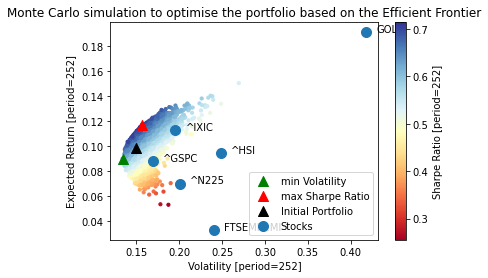

In [8]:
# ## Monte Carlo
# Simulazione Montecarlo per trovare il portfolio con la minore volatilità ed il massimo Sharpe Ratio.

opt_w, opt_res = pf.mc_optimisation(num_trials=5000)
pf.mc_properties()
pf.mc_plot_results()
# è possibile aggiungere le azioni al grafico
pf.plot_stocks()

print(opt_res)
print()
print(opt_w)